In [2]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from math import *
import random

In [3]:
def visibility_sps(nu, theta_i, a_i=1, sigma_1=50, sigma_2=50, beta_i=-2.7, b=14.6, nu_0=100) :
    '''
    Returns the visibility from a single point source
    '''
    lm = 3e8 / (nu * 1e6)
    
    T = a_i * (nu/nu_0)**beta_i
    A_p = np.exp(-0.5*((theta_i/(sigma_1*np.pi/180.))**2 + (theta_i/(sigma_2*np.pi/180.))**2))
    f = np.exp(-1j*2*pi*b*theta_i*lm)
    
    return  T*A_p*f

/home/hera/software/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


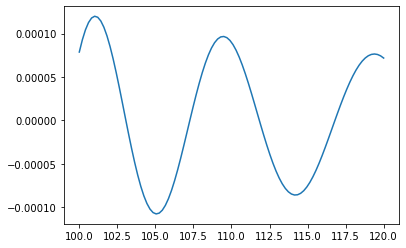

In [7]:
s = 180.*0.1/np.pi
freqs = freqs = np.linspace(100.,120.,num=100)
u = visibility_sps(freqs,0.3,sigma_1 = s, sigma_2=s)

plt.plot(freqs,u)

In [3]:
def visibility_rps(N, nu, theta, a, sigma_1=50, sigma_2=50, beta_i=-2.7, b=14.6, nu_0=100.) :
    '''
    Returns the visibility for N point sources located by theta = {theta_i}
    '''
    
    vis = 0 ;
    for i in range(N) :
        theta_i = theta[i]
        a_i = a[i]
        vis += visibility_sps(nu,theta_i,a_i,sigma_1, sigma_2,beta_i,b,nu_0)
    return vis

## Plots of real part, imaginary part, absolute value and phase of a single point source in function of the angular position theta_i of this source for a given frequency bandwidth

In [36]:
freq_min = 100.
freq_max = 200.
angle_min = -pi/2
angle_max = pi/2
sigma_min = 5.
sigma_max = 100.

freq = np.linspace(freq_min,freq_max,num=500)
angle = np.linspace(angle_min,angle_max,num=500)

freq2D, angle2D = np.meshgrid(freq,angle)

In [50]:
vis = visibility_sps(freq2D, angle2D, sigma_1 =50., sigma_2 = 100.)

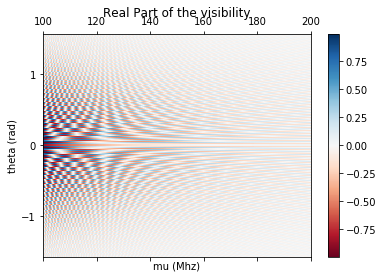

In [51]:
plt.matshow(np.real(vis), extent =(freq_min,freq_max,angle_min,angle_max), cmap='RdBu', aspect='auto')
plt.title('Real Part of the visibility')
plt.xlabel('mu (Mhz)')
plt.ylabel('theta (rad)')
plt.colorbar()
plt.gcf().set_size_inches((6., 4.))

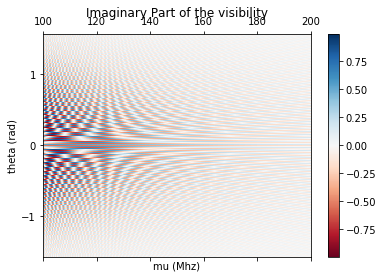

In [52]:
plt.matshow(np.imag(vis), extent =(freq_min,freq_max,angle_min,angle_max), cmap='RdBu', aspect='auto')
plt.title('Imaginary Part of the visibility')
plt.xlabel('mu (Mhz)')
plt.ylabel('theta (rad)')
plt.colorbar()
plt.gcf().set_size_inches((6., 4.))

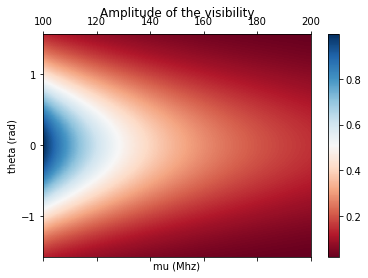

In [53]:
plt.matshow(np.abs(vis), extent =(freq_min,freq_max,angle_min,angle_max), cmap='RdBu', aspect='auto')
plt.title('Amplitude of the visibility')
plt.xlabel('mu (Mhz)')
plt.ylabel('theta (rad)')
plt.colorbar()
plt.gcf().set_size_inches((6., 4.))

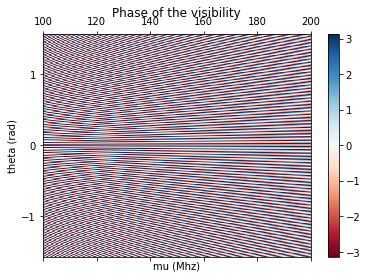

In [54]:
plt.matshow(np.angle(vis), extent =(freq_min,freq_max,angle_min,angle_max), cmap='RdBu', aspect='auto')
plt.title('Phase of the visibility')
plt.xlabel('mu (Mhz)')
plt.ylabel('theta (rad)')
plt.colorbar()
plt.gcf().set_size_inches((6., 4.))

#### We randomely generate what we will consider as the true parameters and construc the likelyhood function logL(x)

In [90]:
random.seed(1)

N = 2
nu = 100.
a = np.ones(N)

#Here are the true parameters
a_data = np.ones(N)
theta_data = np.array([-1.,0.5])#np.random.uniform(angle_min,angle_max,N)
sigma_1_data = 100.
sigma_2_data = 100.

d = visibility_rps(N, nu, theta_data, a_data)

In [91]:
def logL(nu, x, a, sigma_1=50, sigma_2=50, beta_i=-2.7, b=14.6, nu_0=100.) :
    V_model = visibility_rps(N, nu, x, a, sigma_1, sigma_2, beta_i, b, nu_0)
    return -0.5*(np.real(V_model-d)**2 + np.imag(V_model-d)**2)
    #return -0.5*np.abs(V_model-d)**2

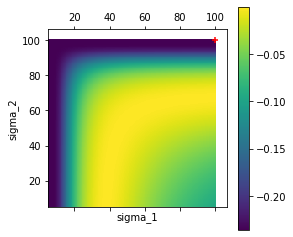

In [92]:
x2D , y2D  = np.meshgrid(np.linspace(sigma_min,sigma_max,num=200) , np.linspace(sigma_min,sigma_max,num=200))

z = logL(nu,theta_data,a,x2D,y2D)

plt.matshow(z, extent =(sigma_min,sigma_max,sigma_min,sigma_max), cmap='viridis')
plt.xlabel('sigma_1')
plt.ylabel('sigma_2')
plt.colorbar()

plt.scatter(sigma_1_data, sigma_2_data,marker = '+', color = 'r')

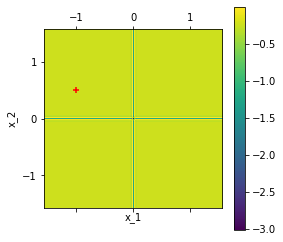

In [93]:
theta2D = np.meshgrid(np.linspace(angle_min,angle_max,num=200) , np.linspace(angle_min,angle_max,num=200))

z = logL(nu,theta2D,a,2.,2.)

plt.matshow(z, extent =(angle_min,angle_max,angle_min,angle_max), cmap='viridis')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.colorbar()

plt.scatter(theta_data[0], theta_data[1] ,marker = '+', color = 'r')

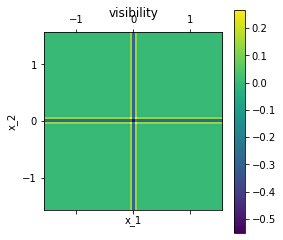

In [94]:
theta2D = np.meshgrid(np.linspace(angle_min,angle_max,num=100) , np.linspace(angle_min,angle_max,num=100))

z = np.real(visibility_rps(N, nu, theta2D, a, 2., 2.))

plt.matshow(z, extent =(angle_min,angle_max,angle_min,angle_max), cmap='viridis')
plt.title('visibility')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.colorbar()

In [77]:
theta_data

array([-0.92398289, -0.27609054])

In [95]:
thetas = np.array([0.09,0.099,0.999])
v_theta1_data = [np.real(visibility([0.1,0.1],sig_1_data,sig_2_data,nu)) for nu in freq_range]

for theta1 in thetas :
    v_theta1 = [np.real(visibility([theta1,0.1],sig_1_data,sig_2_data,nu)) for nu in freq_range]
    plt.plot(freq_range, v_theta1,label='theta = '+str(theta1))

plt.plot(freq_range,v_theta1_data,'r--',label='theta1_data')
plt.xlabel('nu (MHz)')
plt.ylabel('Visibility')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'freq_range' is not defined

In [96]:
import autograd.numpy as np


def vis_sps_2D(theta_i,sig_1,sig_2,nu=100.) :
    lm = 3e8 / (nu * 1e6)
    T = a_i * (nu/nu_0)**beta_i
    A_p = npG.exp(-0.5*((theta_i/(sig_1*np.pi/180.))**2 + (theta_i/(sig_2*np.pi/180.))**2))
    f = npG.exp(-1j*2*pi*b*theta_i*lm)
    return  T*A_p*f

def visibility_2D(theta_1,theta_2,sig_1,sig_2,nu=100.) :
    res = vis_sps(theta_1,sig_1,sig_2,nu) + vis_sps(theta_1,sig_1,sig_2,nu)
    return res

def P_logL_2D(theta_1_model, theta_2_model, sig_1_model, sig_2_model) :
    
    p_sigma = logP_sigma(sig_1_model,sig_1_data) + logP_sigma(sig_2_model,sig_2_data)
    p_theta = logP_theta(theta_1_model,0.1) + logP_theta(theta_2_model,0.1)
    res = p_sigma + p_theta 
    
    for i in range(len(freq_range)) :
        freq = freq_range[i]
        v_model_f = visibility_2D(theta_1_model, theta_2_model, sig_1_model,sig_2_model,freq)
        v_data_f = v_data[i]
        res +=  -0.5*(npG.real(v_model_f-v_data_f)**2 + npG.imag(v_model_f-v_data_f)**2)
    return res

def neg_log_prob_2D(x) :
    theta1 = x[0]
    theta2 = x[1]
    sig1 = x[2]
    sig2 = x[3]
    res = -P_logL_2D(theta1, theta2, sig1, sig2)
    
    return res 

In [ ]:
import autograd.numpy as np
#Leapfrog algorithm
def leapfrog(q,p,dVdq,path_len,step_size) :
    '''
    inputs :
    --------
    q,p (float)^D -> initial position and momentum
    dVdq (function)-> Gradient of velocity
    path_len (float) -> How long each integration path is
    step_size (float) -> How long each integration step shold be
    
    Outputs :
    ---------
    q,p -> new position and momentum
    '''
    q, p = np.copy(q), np.copy(p)

    p -= step_size * dVdq(q) / 2  # half step
    for _ in range(int(path_len / step_size) - 1):
        q += step_size * p  # whole step
        p -= step_size * dVdq(q)  # whole step
    q += step_size * p  # whole step
    p -= step_size * dVdq(q) / 2  # half step

    # momentum flip at end
    return q, -p
    
    
#Hamiltonian Monte Carlo Technique 
def HMC(n_samples, negative_log_prob, initial_position,min_pos,max_pos, path_len=1, step_size = 0.1) :
    '''
    inputs :
    --------
    n_samples (int) -> Number of samples to return
    negative_log_prob (function) -> Negative log probability to sample from
    initial_position (np.array) -> Where we start sampling from
    path_len (float) -> How long each integration path is. Smaller is faster and more correlated.
    step_size (float) -> How long each integration step is. Smaller is slower and more accurate.
    
    Outputs :
    ---------
    An array of length n_samples
    ''' 
    dVdq = grad(negative_log_prob)
    
    samples = [initial_position]
    
    momentum = st.norm(0, 1)
    
    size = (n_samples,) + initial_position.shape[:1]
    for p0 in momentum.rvs(size=size):
        # Integrate over our path to get a new position and momentum
        q_new, p_new = leapfrog(
            samples[-1],
            p0,
            dVdq,
            path_len=path_len,
            step_size=step_size,
        )
        
        #Check that each parameter is in the right range :
        q_new = np.minimum(np.maximum(q_new,min_pos),max_pos)

        # Check Metropolis acceptance criterion
        start_log_p = negative_log_prob(samples[-1]) - np.sum(momentum.logpdf(p0))
        new_log_p = negative_log_prob(q_new) - np.sum(momentum.logpdf(p_new))
        
        #print(q_new)
        print('start_log_p = '+ str(start_log_p))
        print('new_log_p = '+ str(new_log_p))   
        #print(start_log_p - new_log_p)
    
        if np.log(np.random.rand()) < start_log_p - new_log_p:
            samples.append(q_new)
            #print('accept')
        else:
            samples.append(np.copy(samples[-1]))
            #print('reject')
            
    return np.array(samples[1:])